# APS 2 - Transferência de Calor e Mecânica dos Sólidos

## Enunciado

Considere uma aleta de seção transversal circular e constante, com temperatura fixa na base e exposta ao ambiente em todas as outras superfícies. Podemos esboçar as entradas e saídas de energia em um volume de controle definido ao redor de uma seção como indica a Fig.1.

<img src="./enunciado.jpeg" />

- $q_x$ taxa de transferência de calor por condução em $x$.
- $q_{x + dx}$ taxa de transferência de calor por condução em $x + dx$.
- $dq_{conv}$ taxa de transferência de calor por convecção através da área superficial do elemento diferencial.

Substituindo as equações de taxa $q_x$, $q_{x + dx}$ e $dq_{conv}$ podemos obter a forma geral da equação da energia para uma 
superfície estendida, em regime transiente como: 

<img src="./eq.jpeg">

## Roteiro

- Aplique os conceitos do método das diferenças finitas na equação diferencial do problema para definir uma equação de diferença algébrica associada aos nós da aleta. Considere para a segunda derivada da temperatura no espaço uma equação de diferença finita centrada e para a primeira derivada no tempo da temperatura uma equação de diferença progressiva. Apresente o desenvolvimento das equações.

- Apresente um gráfico ($Temperatura \times posição$) após obter o regime permanente. Use uma tolerância de $tol = 1 \cdot10^{-10}$. Considere que a aleta, de comprimento $L = 300mm$ , densidade de $2700 kg/m^3$ , condutividade térmica de $180 W/(mK)$ e calor específico $896 J/(kg K)$, tem a temperatura especificada na extremidade de $T(L) = 25 °C$. A aleta está em contato com uma base a $𝑇_b = 100℃$ em um ambiente a $𝑇_{\infty} = 50 °C$ e $h = 50W/m^2K$. Para a condição de estabilidade do procedimento numérico use $\Delta t \leq \frac{\Delta x^2}{\alpha \cdot \left(\frac{h P \Delta x^2}{k A_{tr}} + 2 \right) }$.

- Para validar os resultados obtidos com o software desenvolvido, apresente um gráfico ($Temperatura \times posição$) para o comportamento analítico da temperatura na aleta usando as mesmas condições definidas no item anterior.

### Bibliotecas necessárias

In [13]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

### Parâmetros e constantes iniciais fornecidas

In [2]:
# Tolerância
tol = 1e-10

# Comprimento da aleta (m)
L = 0.3

# Densidade (kg / m^3)
dens = 2700

# Condutividade térmica (W/m.K)
k = 180

# Calor específico (J/kg.K)
c = 896

# Temperatura na extremidade (K)
T_L = 25 + 273

# Temperatura da base (K)
T_b = 100 + 273

# Temperatura do ambiente (K)
T_amb = 50 + 273

# Constante de convecção (W / K.m^2)
h = 50

# Difusividade
alpha = k / (dens * c)

### Parâmetros e constantes definidos para um caso

In [3]:
# Raio da aleta (m)
r = 3e-3

# Delta x (0.1 mm)
dx = 1e-3

# Tempo total (5 min)
t_total = 10 * 60

#### Valor máximo para $\Delta t$

In [4]:
# Área transversal
A_tr = pi * (r**2)

# Perímetro
P = 2 * pi * r

dt = (dx**2) / (alpha * (2 + (h*P*(dx**2)) / (k * A_tr)))
# dt = 0.01
print(f"Para condição de estabilidade: dt < {dt}")

Para condição de estabilidade: dt < 0.006719377835385612


### Começando a brincadeira

In [5]:
time_list = np.arange(0, t_total + dt, dt)
lgth_list = np.arange(0, L + dx, dx)

# Número de nós
nn = int(L/dx) + 1

# Número de passos no tempo
steps = int(t_total/dt) + 1

# Matriz de temperaturas
temp_list = np.zeros((steps, nn))
# temp_list_aux = np.zeros((steps, nn))

temp_list[:, 0] = T_b
temp_list[:, 1:nn-2] = T_b
temp_list[:, nn-1] = T_L

In [6]:

for t in range(0, steps-1):
    for i in range(1, len(lgth_list) - 1):
        coef_1 = (temp_list[t, i + 1] - (2 * temp_list[t, i]) + temp_list[t, i - 1]) / (dx**2)
        coef_2 = (h * P * (temp_list[t, i] - T_amb)) / (k * A_tr)
        temp_list[t+1, i] = temp_list[t, i] + alpha * dt * (coef_1 - coef_2)
        
#         diff = abs(temp_list[t+1, i] - temp_list[t, i])
#         if diff <= tol:
#             print('Ponto de convergência', t, i)
#             break


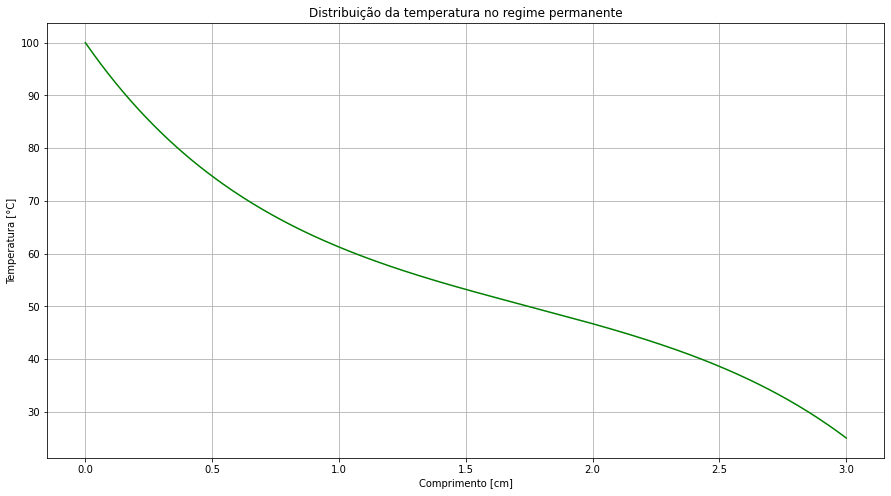

In [7]:
plt.figure(figsize=(15, 8))
plt.title("Distribuição da temperatura no regime permanente")
plt.plot(lgth_list * 10, temp_list[-1, :] - 273, 'g')
plt.xlabel("Comprimento [cm]")
plt.ylabel("Temperatura [°C]")
plt.grid()
plt.show()

In [8]:
steps

89294

In [9]:
diff = abs((temp_list[-1, 10] - temp_list[-2, 10]) / temp_list[-2, 10])
diff

3.1731204324618114e-11

### Solução Analítica

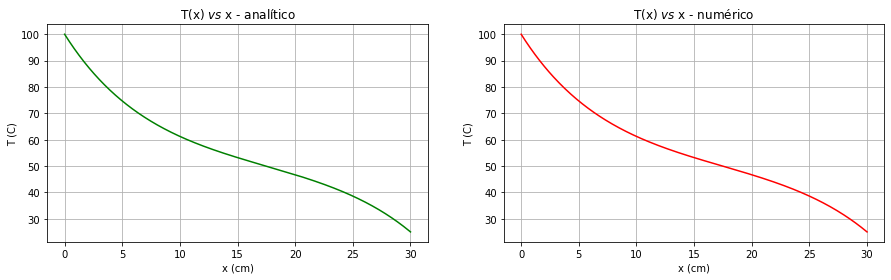

In [29]:
m            = sqrt((h*P) / (k*A_tr))
temps        = []
lista_x      = np.linspace(0,L,10000)
lista_x_cm   = np.linspace(0,100*L,10000) # eixo x em cm
theta_l      = T_L - T_amb
theta_b      = T_b - T_amb

for x in lista_x:
    numerador   = (theta_l/theta_b)*sinh(m*x) + sinh(m*(L-x))
    denominador = sinh(m*L)
    temperatura = T_amb + (numerador/denominador)*(T_b - T_amb)
    temps.append(temperatura)
    
temps_em_c = [t-273 for t in temps]
plt.figure(figsize=(15, 4))


plt.subplot(121)
plt.plot(lista_x_cm, temps_em_c, 'g')
plt.title("T(x) $vs$ x - analítico")
plt.xlabel("x (cm)")
plt.ylabel("T (C)")
plt.grid()

plt.subplot(122)
plt.plot(lgth_list*100, temp_list[-1, :] - 273, 'r')
plt.title("T(x) $vs$ x - numérico")
plt.xlabel("x (cm)")
plt.ylabel("T (C)")
plt.grid()

plt.show()